# 0.) Import the Credit Card Fraud Data From CCLE

In [18]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#drive.mount('/content/gdrive/', force_remount = True)

In [20]:
df = pd.read_csv("fraudTest.csv")

In [21]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [22]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/dt/1b6q3xtd4g5bbyfmssxs3h800000gn/T/ipykernel_10814/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/dt/1b6q3xtd4g5bbyfmssxs3h800000gn/T/ipykernel_10814/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [25]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [28]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [31]:
over_log.score(X_test, y_test)

0.9017490822716476

In [32]:
under_log.score(X_test, y_test)

0.8923078768684469

In [33]:
smote_log.score(X_test, y_test)

0.9013052136567576

In [34]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [35]:
# Sensitivity here in credit fraud is more important as seen from last class

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
y_true = y_test

In [38]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[74928,  8109],
       [   81,   240]])

In [39]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7476635514018691


In [40]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[74141,  8896],
       [   81,   240]])

In [41]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7476635514018691


In [42]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[74891,  8146],
       [   81,   240]])

In [43]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7476635514018691


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [44]:
# Convert numpy arrays to pandas DataFrames
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Concatenate the DataFrames
raw_temp = pd.concat([X_train_df, y_train_df], axis=1)

#what prof wrote
#raw_temp = pd.concat([X_train, y_train], axis =1)

#raw_temp = pd.concat([X_train, y_train], axis =1)

In [50]:
raw_temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,is_fraud
0,0.081159,-0.292781,-0.549150,-0.278612,-0.276042,-0.335849,-0.19006,-0.322849,-0.265176,3.095333,-0.310261,-0.227290,-0.257481,-0.276446,-0.284878,-0.31405,-0.180044,0.0
1,-0.236183,-0.281095,1.243178,-0.278612,3.622634,-0.335849,-0.19006,-0.322849,-0.265176,-0.323067,-0.310261,-0.227290,-0.257481,-0.276446,-0.284878,-0.31405,-0.180044,0.0
2,-0.155007,-0.288644,-0.896053,-0.278612,3.622634,-0.335849,-0.19006,-0.322849,-0.265176,-0.323067,-0.310261,-0.227290,-0.257481,-0.276446,-0.284878,-0.31405,-0.180044,0.0
3,0.002526,-0.290631,-0.433516,-0.278612,-0.276042,-0.335849,-0.19006,-0.322849,-0.265176,3.095333,-0.310261,-0.227290,-0.257481,-0.276446,-0.284878,-0.31405,-0.180044,NaN
4,0.131082,-0.291087,-0.375699,-0.278612,-0.276042,-0.335849,-0.19006,-0.322849,-0.265176,-0.323067,-0.310261,4.399666,-0.257481,-0.276446,-0.284878,-0.31405,-0.180044,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
502955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
528796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
535515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [48]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


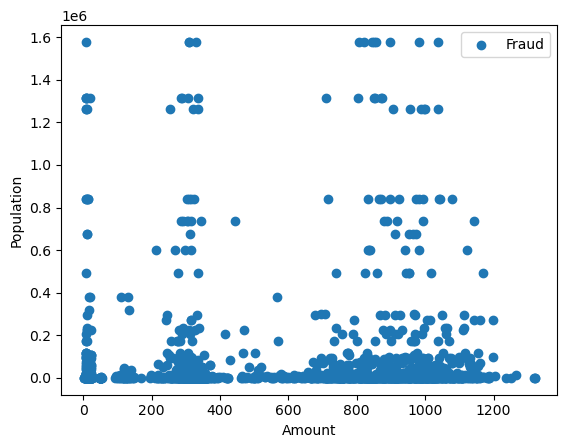

In [53]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(df[df["is_fraud"] == 1]["amt"], df[df["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [54]:
# Convert numpy arrays to pandas DataFrames
smote_X_df = pd.DataFrame(smote_X)
smote_y_df = pd.DataFrame(smote_y)

# Concatenate the DataFrames
raw_temp = pd.concat([smote_X_df, smote_y_df], axis=1)

#raw_temp = pd.concat([smote_X, smote_y], axis =1)

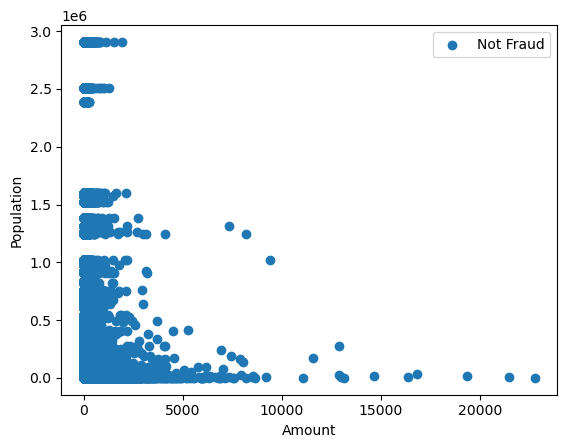

In [73]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0], raw_temp[raw_temp["is_fraud"] == 1])
plt.scatter(df[df["is_fraud"] == 0]["amt"], df[df["is_fraud"] == 0]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [59]:
resampling_methods = {
    "over": RandomOverSampler(),
    "under": RandomUnderSampler(),
    "smote": SMOTE(),
}

model_configs = {
    "LOG": LogisticRegression(),
    "Laso": LogisticRegression(penalty = "l1", # Logistic Lasso 
                               C = 2., #C = Inverse of Lambda, 
                               solver = "liblinear"), 
    "DTREE": DecisionTreeClassifier()
}


In [63]:
trained_models = {}
#results = []

In [64]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train) 
    
    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        trained_models[combined_key] = model.fit(resample_X, resample_y)
#        print(combined_key)

        # Model with the resampled data 
 #       
        

In [69]:
def calc_perf_metric(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    
    return(sensitivity, specificity, precision, recall, F1)

In [70]:
trained_models = {}
results = []

In [71]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        
        m = model.fit(resample_X, resample_y)
        
        trained_models[combined_key] = m 
        
        y_pred = m.predict(X_test)
        
        sensitivity, specificity, precision, recall, F1 = calc_perf_metric(y_test, y_pred)
        
        results.append({"Model": combined_key, 
                       "Sensitivity": sensitivity, 
                       "Specificity": specificity,
                       "Precision": precision, 
                       "Recall": recall,
                       "F1": F1})
        
#        results.append(calc_perf_metric(y_test, y_pred))

In [72]:
results_df = pd.DataFrame(results)
results_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.747664,0.903657,0.029126,0.747664,0.056068
1,over_Laso,0.747664,0.903742,0.029151,0.747664,0.056114
2,over_DTREE,0.517134,0.998145,0.518750,0.517134,0.517941
3,under_LOG,0.744548,0.899876,0.027943,0.744548,0.053865
4,under_Laso,0.744548,0.899563,0.027859,0.744548,0.053708
5,under_DTREE,0.937695,0.950528,0.068269,0.937695,0.127273
6,smote_LOG,0.747664,0.901803,0.028592,0.747664,0.055077
7,smote_Laso,0.747664,0.901839,0.028602,0.747664,0.055096
8,smote_DTREE,0.651090,0.993641,0.283582,0.651090,0.395085


According to the different results, it can be concluded that the model with the highest *Sensitivity*, meaning the highest prediction of positive cases, is the Under Decission Tree. While the one with the highest score of *Specificity* is over the decision Tree. Hence, the best model would be *Decision Tree*. 